<center><h1>To predict Diabetes using PIMA dibetes Data</h1></center>
 <center><h3>Notes By Jagdish Chavan</h3></center>

### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
#importing Dataset
df = pd.read_csv('/home/jc/project/diabetes_Ml/3_dset/diabetes.csv')

In [3]:
#checking shape of dataset
df.shape

(768, 9)

In [4]:
#checking sample of dataset
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# get info on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
#check if any null value are present
df.isnull().values.any()

False

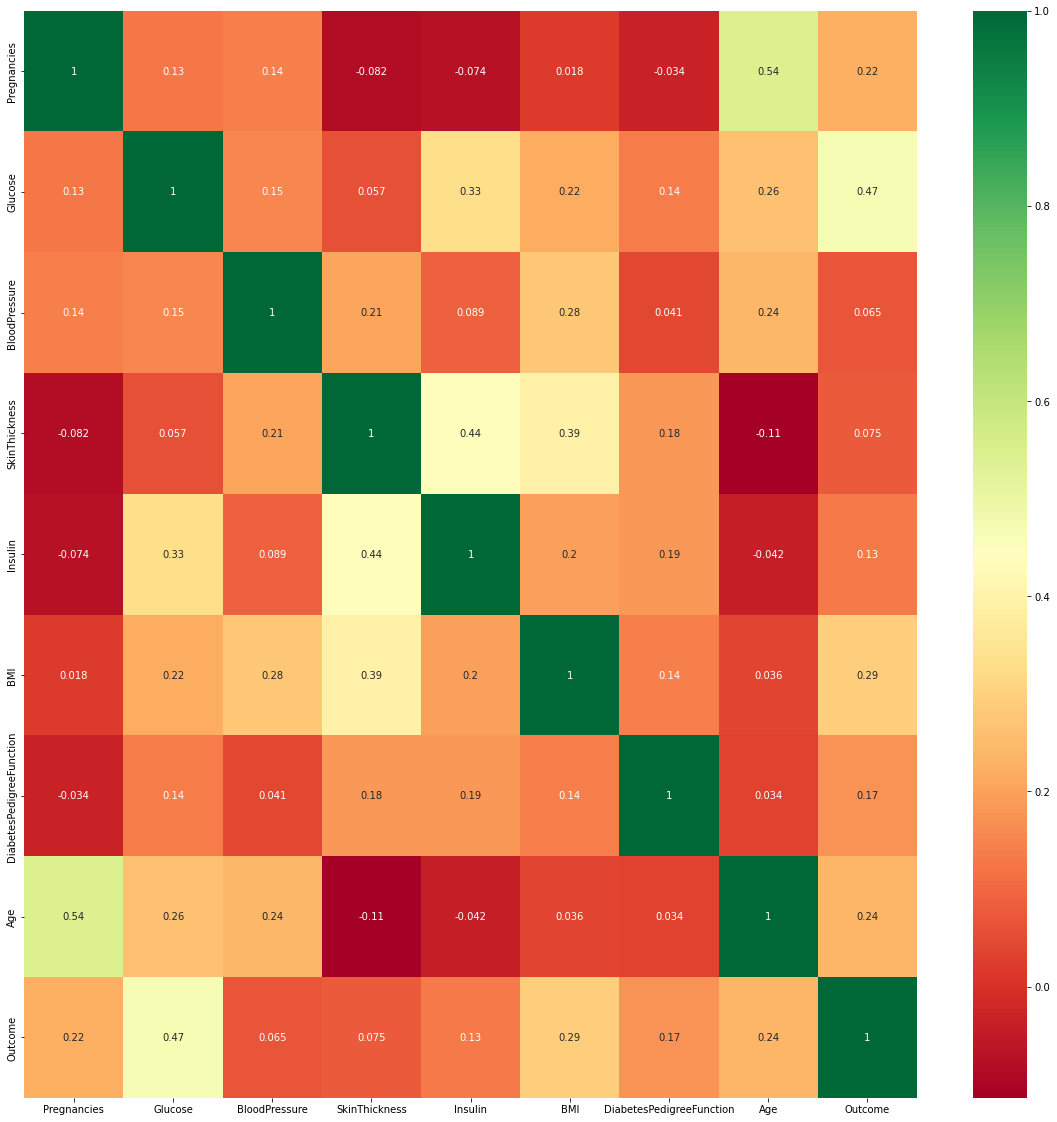

In [7]:
#finding the corelation in features
import seaborn as sns
import matplotlib.pyplot as plt

#get corelation of each features in Dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g = sns.heatmap(df[top_corr_features].corr(),annot=True,cmap='RdYlGn')

In [8]:
#to jsut check for value
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [9]:
#check datset is balance or not
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

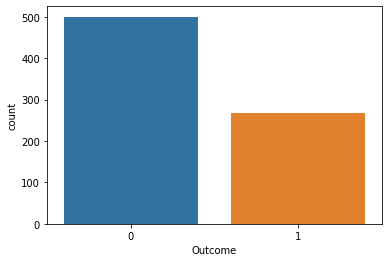

In [10]:
sns.countplot(df['Outcome'])

/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

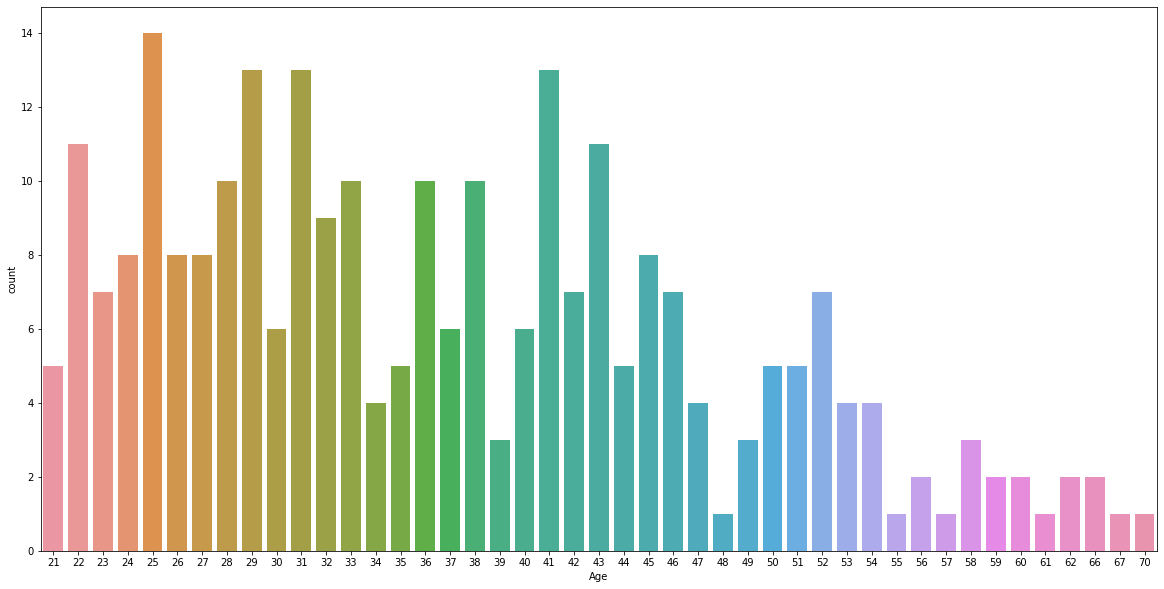

In [11]:
#lets analyze the diabetes patients distribution over age
plt.figure(figsize=(20,10))
sns.countplot(df[df['Outcome']==1]['Age'])

<AxesSubplot:xlabel='Age', ylabel='Count'>

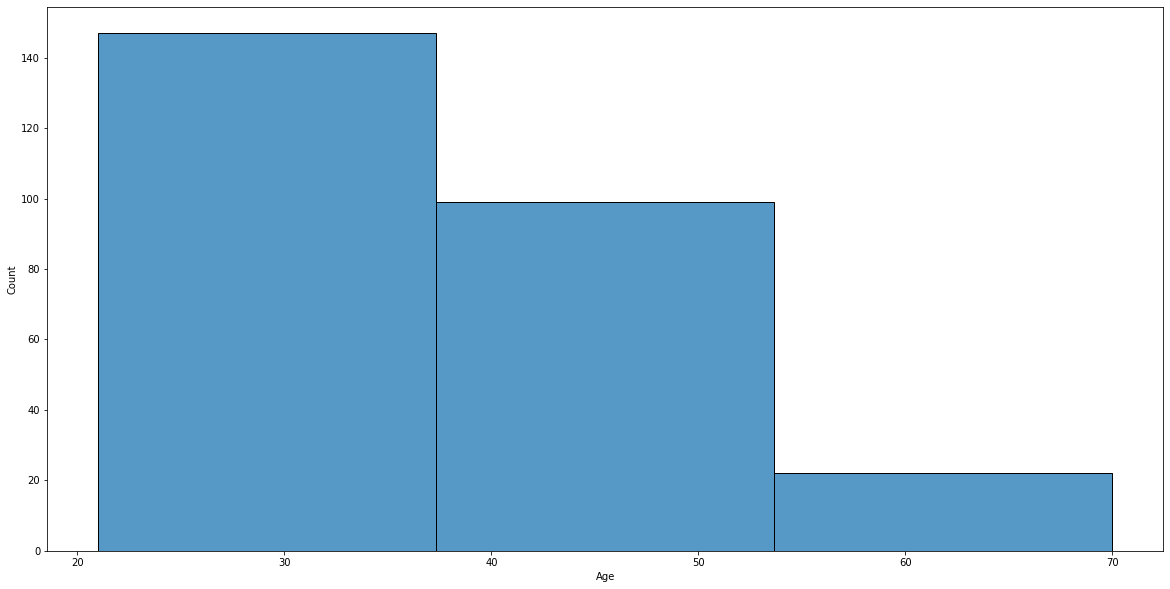

In [12]:
plt.figure(figsize=(20,10))
sns.histplot(df[df['Outcome']==1]['Age'],bins=3)

In [13]:
def plotGraph(col):
    
    for ele in col:
        
        print('Plots for : ',ele)
        plt.figure(figsize=(30,10))
        
        # Distribution plot
        plt.subplot(1,3,1)
        sns.distplot(df[ele])
        plt.title('Distribution Plot')
        
        # Histogram
        plt.subplot(1,3,2)
        sns.histplot(df[ele])
        plt.title('Histogram plot')
        
        # Box plot
        plt.subplot(1,3,3)
        sns.boxplot(df[ele])
        plt.title('Box Plot')
        
        plt.show()

Plots for :  Pregnancies


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


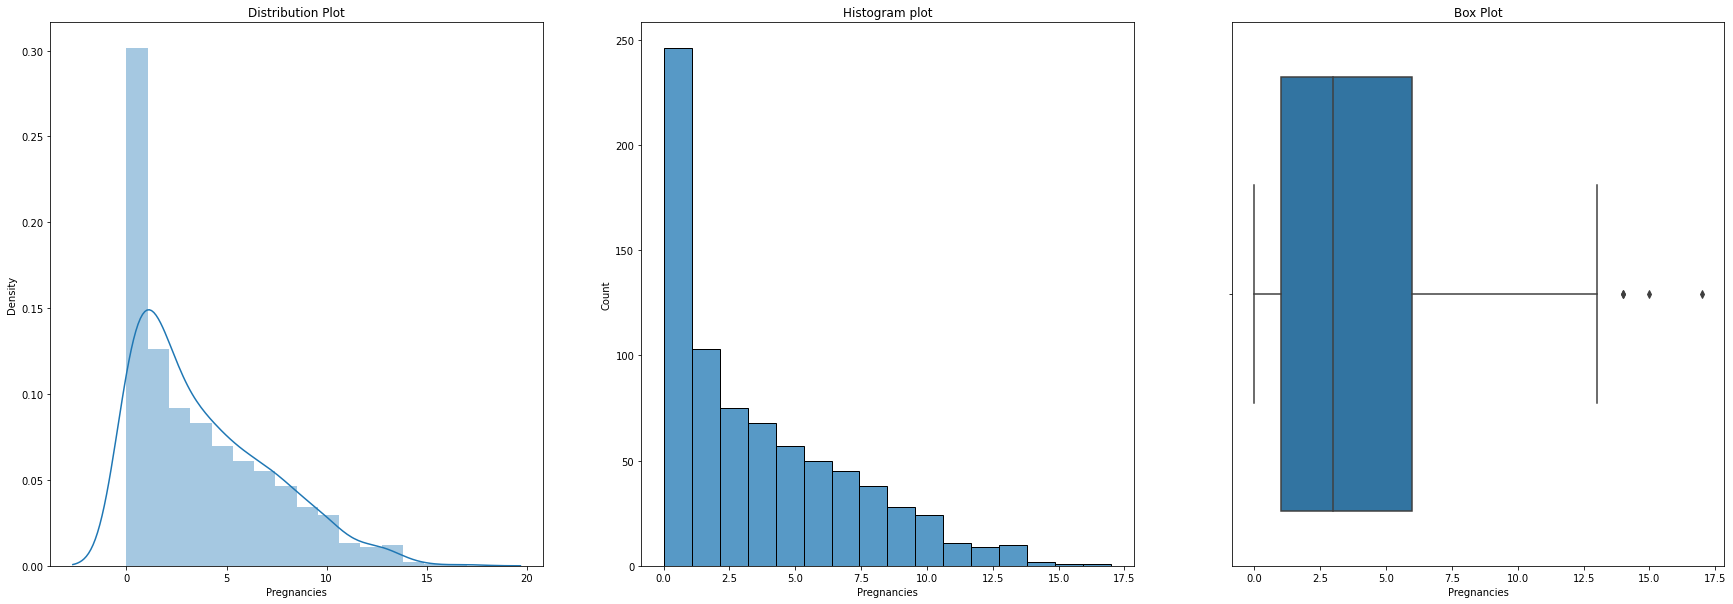

Plots for :  Glucose


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


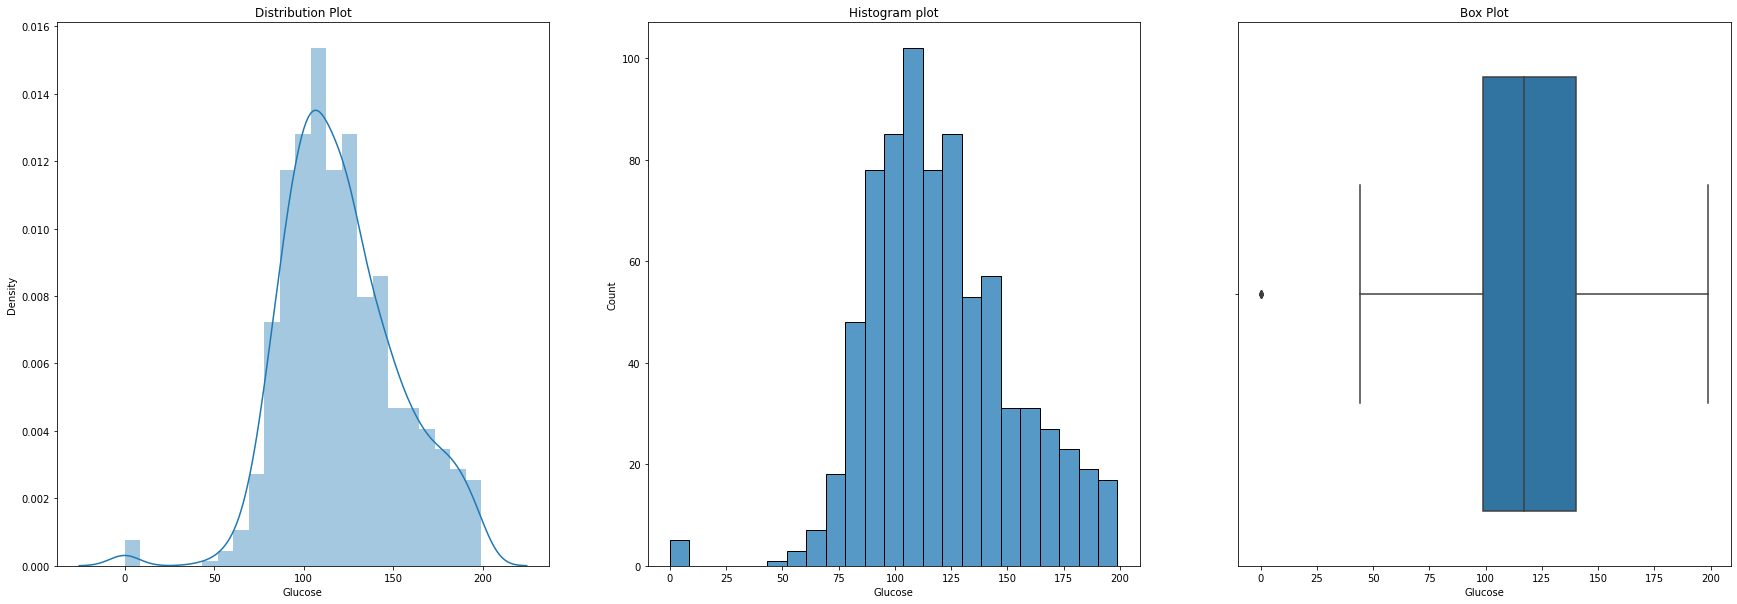

Plots for :  BloodPressure


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


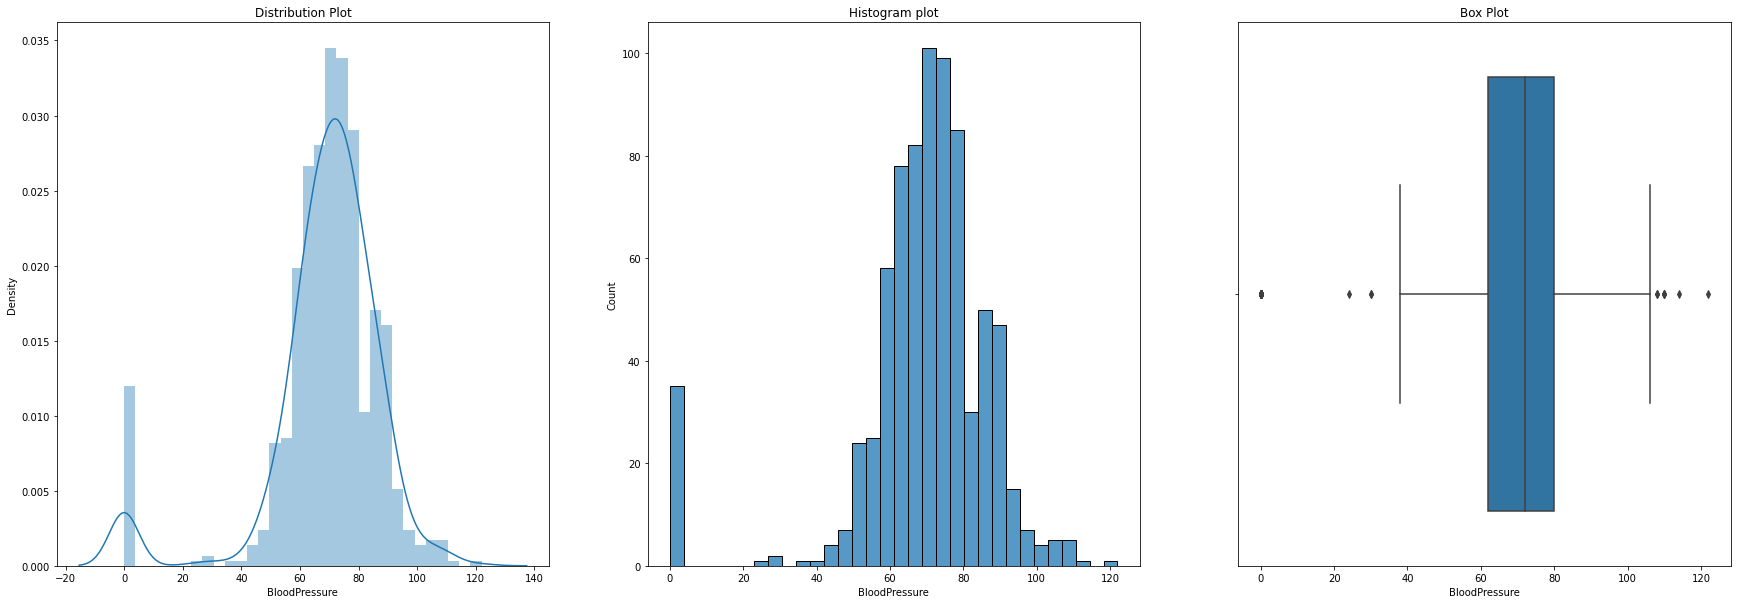

Plots for :  SkinThickness


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


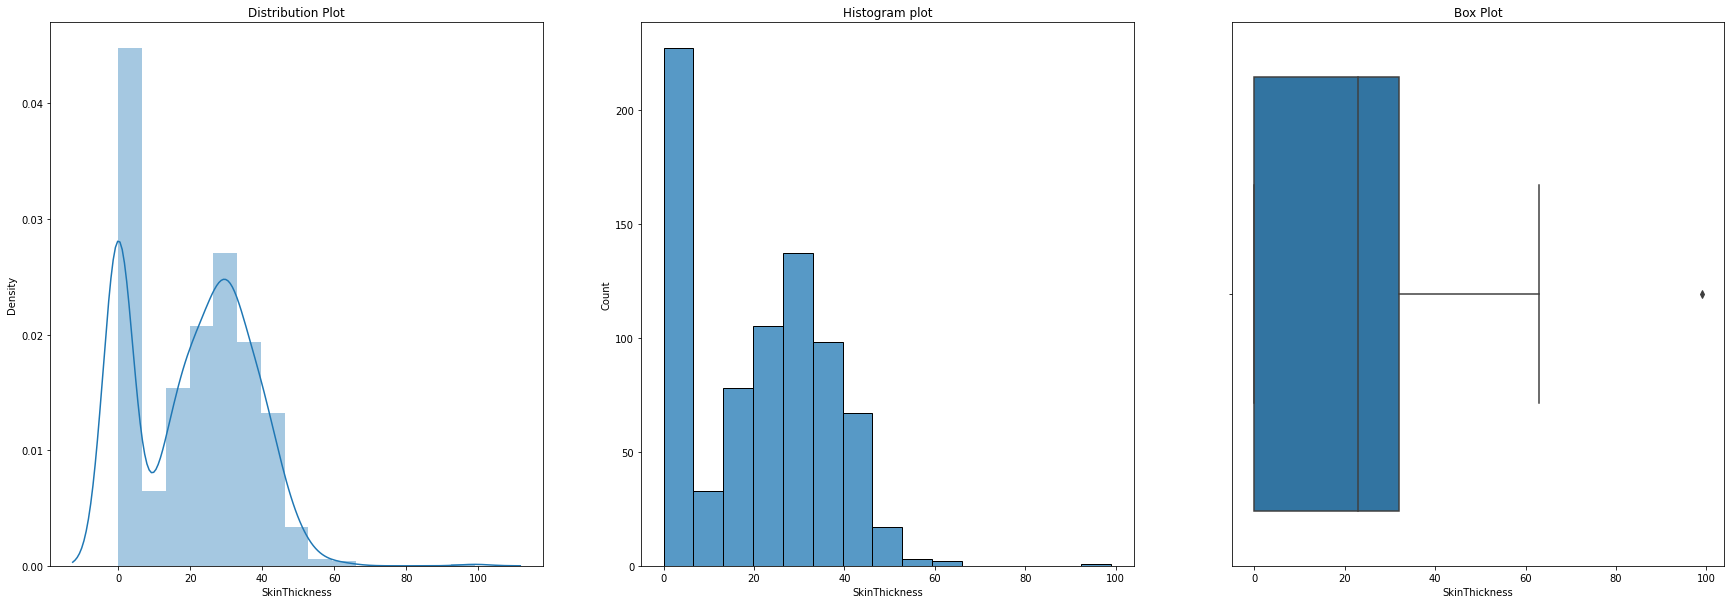

Plots for :  Insulin


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


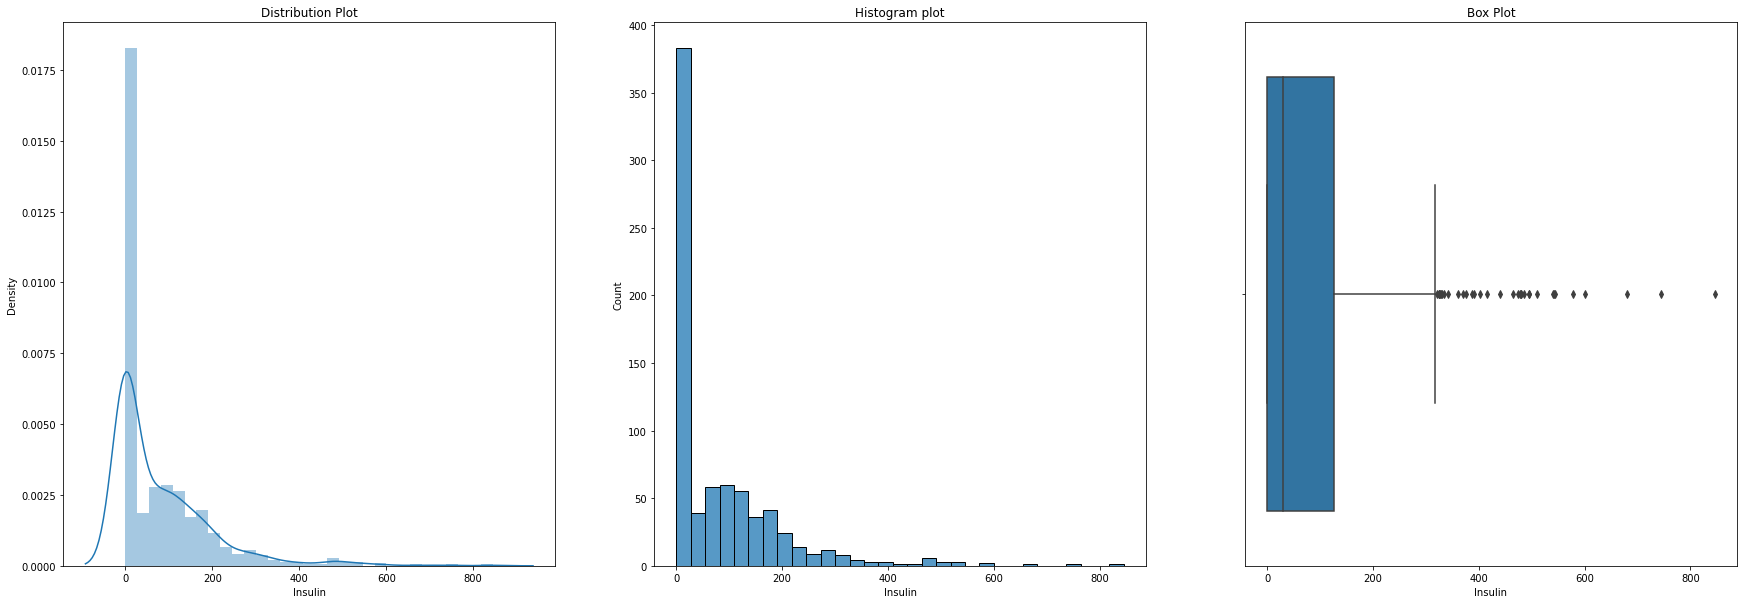

Plots for :  BMI


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


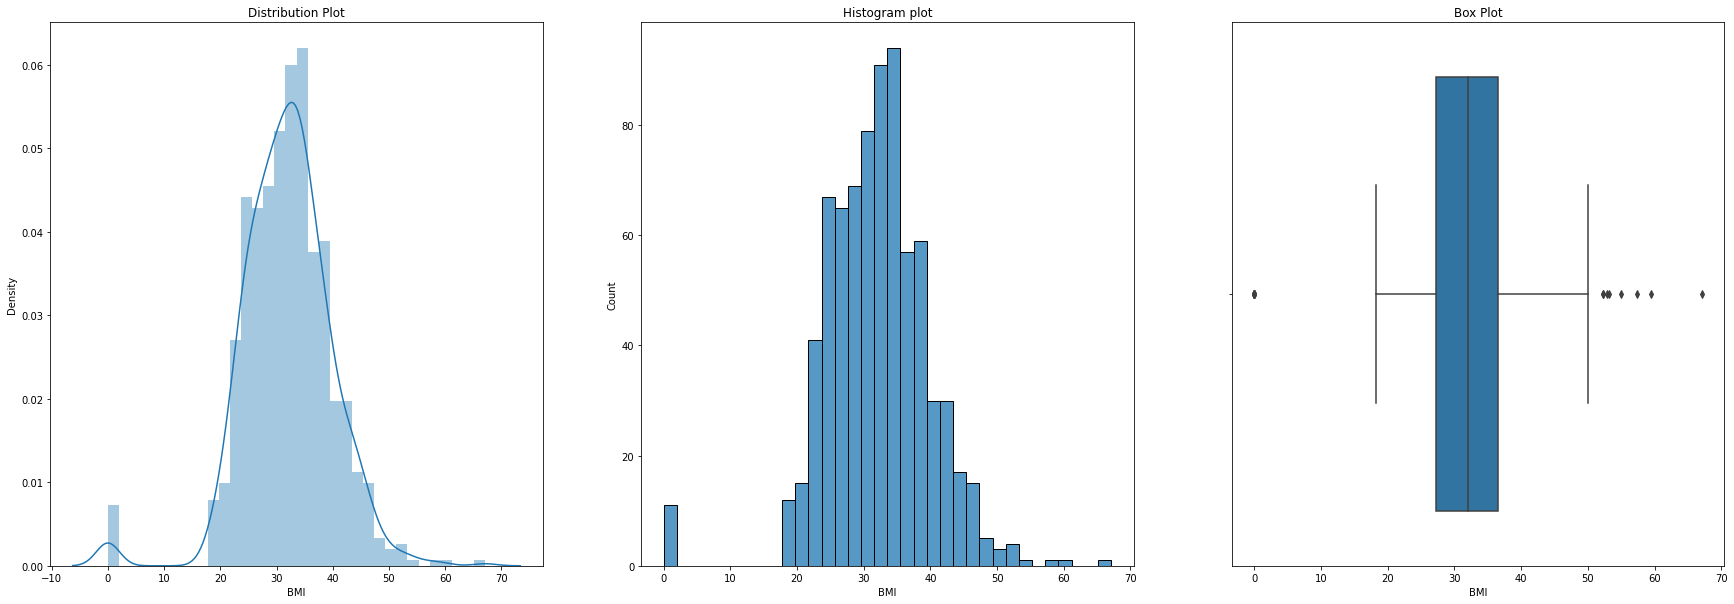

Plots for :  DiabetesPedigreeFunction


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


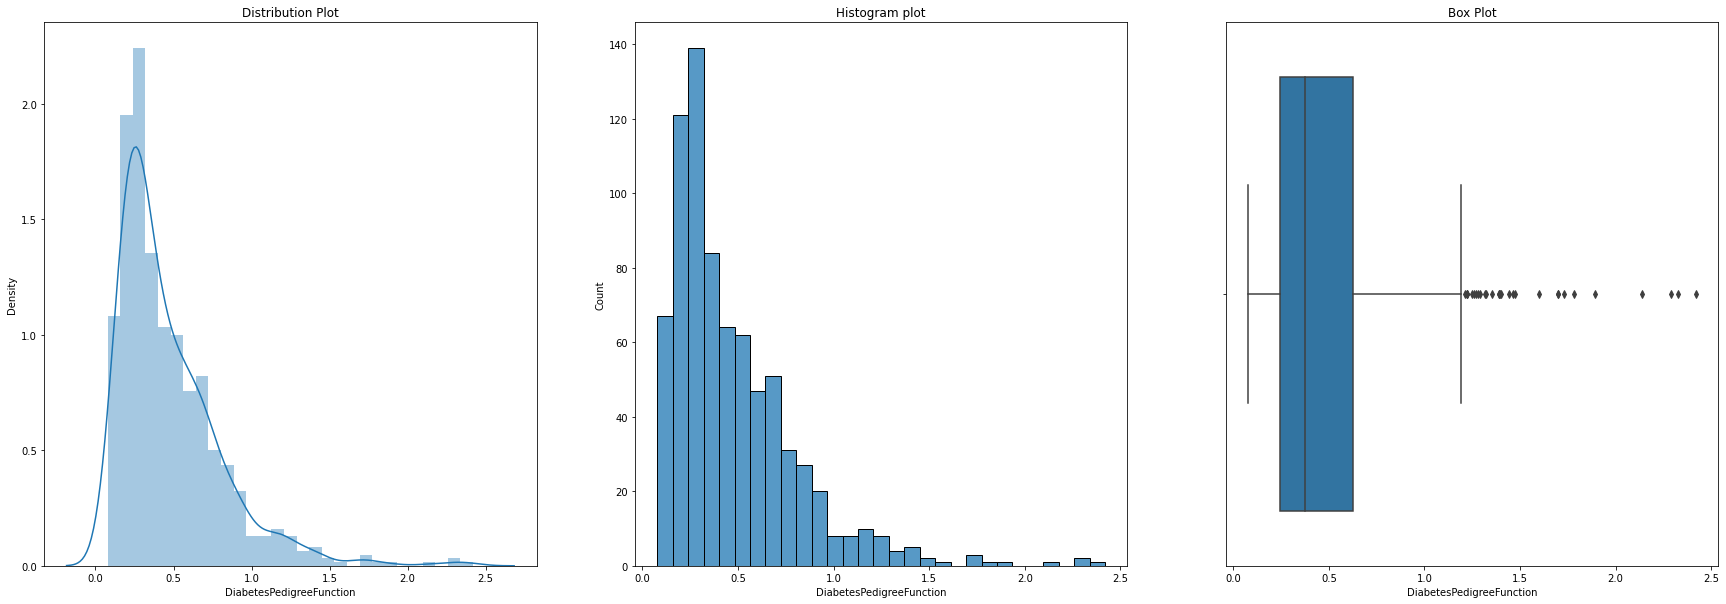

Plots for :  Age


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


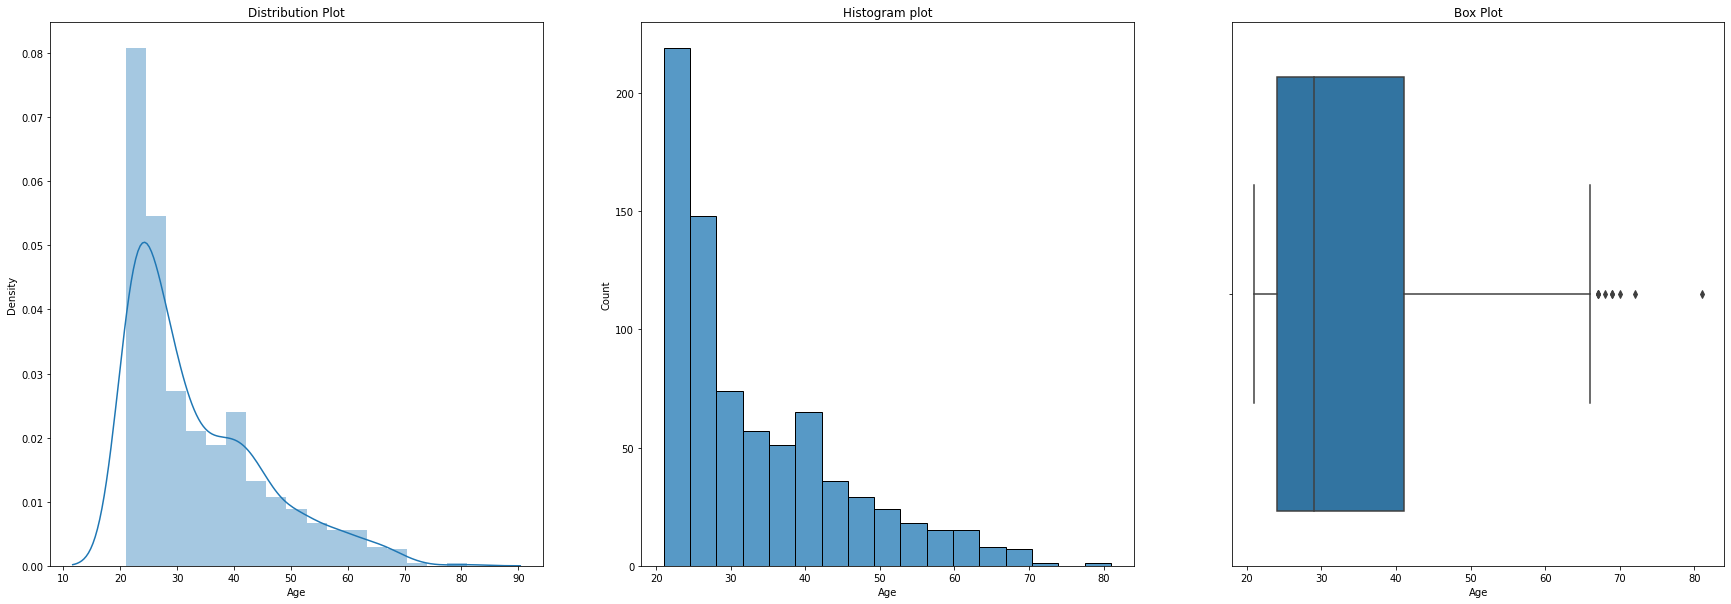

Plots for :  Outcome


/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


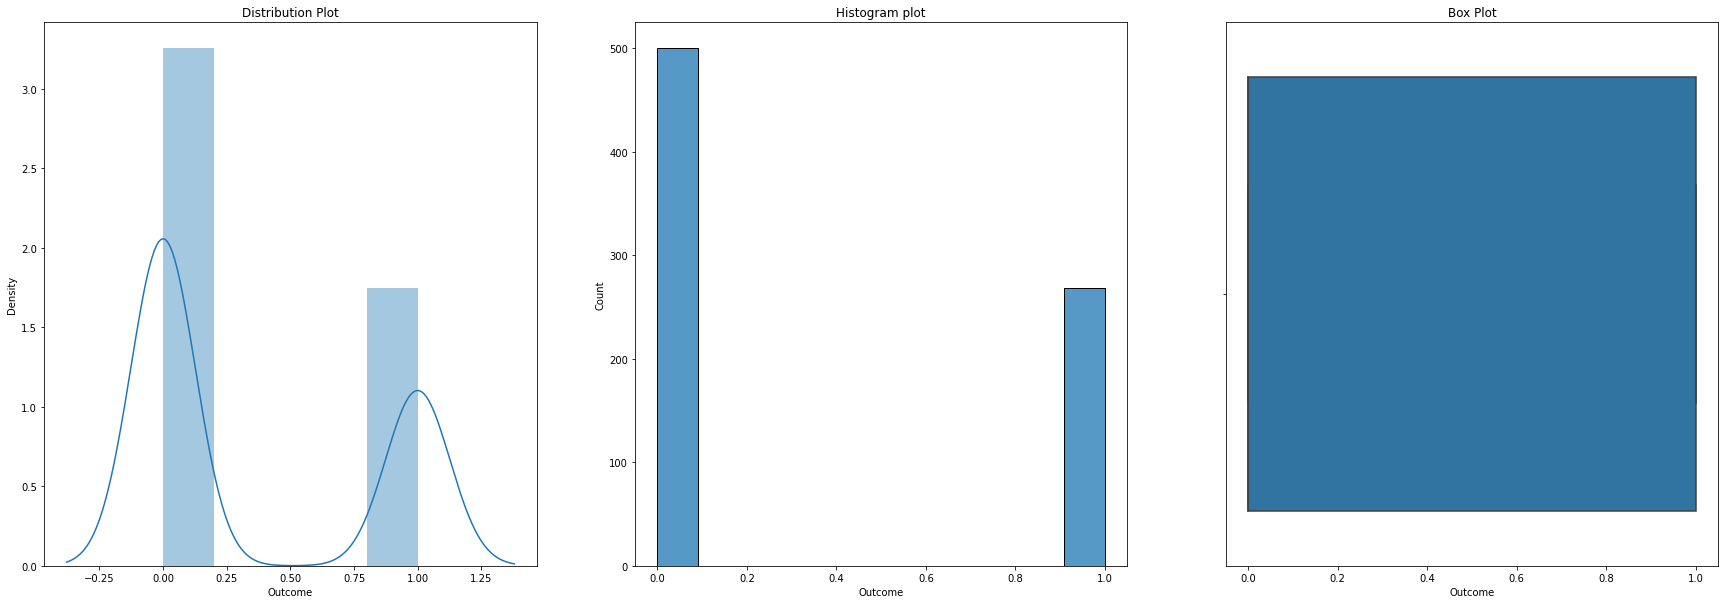

In [14]:
plotGraph(df.columns)

In [15]:
#train test split
from sklearn.model_selection import train_test_split
features_columns = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
predicted_class=['Outcome']

In [16]:
X = df[features_columns].values
y = df[predicted_class].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=10)

## Check How Many other missing(zero) values

In [17]:
# LEtd check if there is any null value present
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [18]:
#Lets see some Statistical info about the features

df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [19]:
print('Total number of rows: {}'.format(len(df)))
print('number of rows missing Glucose: {}'.format(len(df.loc[df['Glucose']==0])))
print('number of rows missing BloodPresure: {}'.format(len(df.loc[df['BloodPressure']==0])))
print('number of rows missing SkinThickness: {}'.format(len(df.loc[df['SkinThickness']==0])))
print('number of rows missing Insulin: {}'.format(len(df.loc[df['Insulin']==0])))
print('number of rows missing BMI: {}'.format(len(df.loc[df['BMI']==0])))
print('number of rows missing DiabetesPedigreeFunction: {}'.format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print('number of rows missing Age: {}'.format(len(df.loc[df['Age']==0])))


Total number of rows: 768
number of rows missing Glucose: 5
number of rows missing BloodPresure: 35
number of rows missing SkinThickness: 227
number of rows missing Insulin: 374
number of rows missing BMI: 11
number of rows missing DiabetesPedigreeFunction: 0
number of rows missing Age: 0


In [20]:
#imputing the missing values
from sklearn.impute import SimpleImputer
fill_values = SimpleImputer(missing_values=0, strategy='mean')

X_train =fill_values.fit_transform(X_train)
X_test = fill_values.fit_transform(X_test)

In [21]:
## Apply Algorithm

from sklearn.ensemble import RandomForestClassifier
random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(X_train, y_train.ravel())

RandomForestClassifier(random_state=10)

In [22]:
predict_train_data = random_forest_model.predict(X_test)

from sklearn import metrics

print("Accuracy={:0.3f}".format(metrics.accuracy_score(y_test,predict_train_data)))

Accuracy=0.766


In [ ]:
df.to_csv('/home/jc/project/diabetes_Ml/3_dset/diabetes1.csv')

In [23]:
# Hyper Parameter Optimization

parms={
    "learning_rate"     :[0.05,0.10,0.15,0.20,0.25,0.30],
    "max_depth"         :[3,4,5,6,8,10,12,15],
    "min_child_weight"  :[1,3,5,7],
    "gama"              :[0.0,0.1,0.2,0.3,0.4],
    "colsample_bytree"  :[0.3,0.4,0.5,0.7]
}

In [24]:
#hyperparameter optimization using RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
import xgboost

In [25]:
classifier = xgboost.XGBClassifier()

In [26]:
random_search=RandomizedSearchCV(classifier,param_distributions=parms,n_iter=5,scoring='roc_auc',n_jobs=-1,cv=5,verbose=3)

In [27]:
def timer(start_time=None):
    if not start_time :
        start_time = datetime.now()
        return start_time
    elif start_time :
        thour,temp_sec = divmod((datetime.now()-start_time).total_seconds(),3600)
        tmin,tsec =divmod(temp_sec,60)
        print('\n Time taken: %i hours %i minutes and %s seconds'%(thour, tmin, round(tsec,2)))


In [28]:
from datetime import datetime

#here we go
start_time =timer(None)
random_search.fit(X_train,y_train.ravel())
timer(start_time)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


KeyboardInterrupt: 

In [ ]:
#checking best estimator
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gama=0.0, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
classifier=xgboost.XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gama=0.0, gamma=0,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=12,
              min_child_weight=5, missing=None, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [ ]:
#cross valadiation score
from sklearn.model_selection import cross_val_score
score=cross_val_score(classifier,X_train,y_train.ravel(),scoring='accuracy',cv=10)

/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call

[11:29:28] WARNING: ../src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:28] WARNING: ../src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:28] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me

/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/xgboost/sklear

[11:29:29] WARNING: ../src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[11:29:29] WARNING: ../src/learner.cc:573: 
Parameters: { "gama" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[11:29:29] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation me

/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:696: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 87, in __call__
    score = scorer._score(cached_call, estimator,
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/home/jc/anaconda3/envs/ML/lib/python3.8/site-packages/xgboost/sklear

In [ ]:
score

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan])

In [ ]:
score.mean()

nan